In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data from the Excel file
file_path = 'Data/Iterations.xlsx'
df = pd.read_excel(file_path)

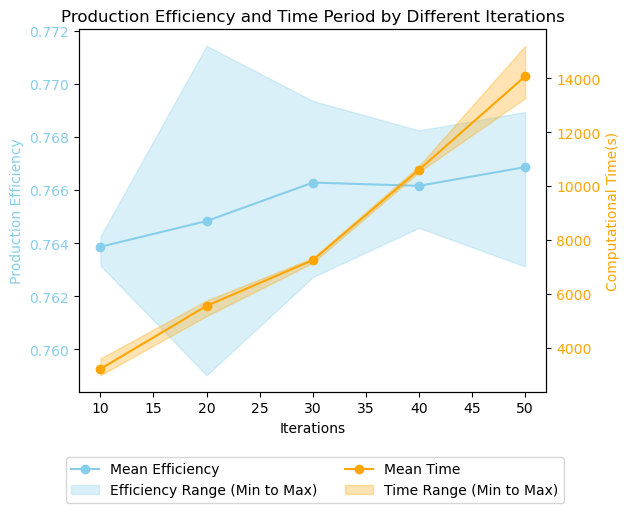

In [3]:
# Assuming the Excel file has columns named 'Iterations', 'Production Efficiency', and 'Time Period'
iterations = df['Iterations'].unique()

# Calculate mean, min, and max for Production Efficiency and Time Period
mean_efficiency = df.groupby('Iterations')['Production Efficiency'].mean()
min_efficiency = df.groupby('Iterations')['Production Efficiency'].min()
max_efficiency = df.groupby('Iterations')['Production Efficiency'].max()

mean_time = df.groupby('Iterations')['Time Period'].mean()
min_time = df.groupby('Iterations')['Time Period'].min()
max_time = df.groupby('Iterations')['Time Period'].max()

# Plotting
fig, ax1 = plt.subplots()

# Plot mean and range for Production Efficiency
ax1.plot(iterations, mean_efficiency, 'o-', color='skyblue', label='Mean Efficiency')
ax1.fill_between(iterations, min_efficiency, max_efficiency, color='skyblue', alpha=0.3, label='Efficiency Range (Min to Max)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Production Efficiency', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the Time Period
ax2 = ax1.twinx()
ax2.plot(iterations, mean_time, 'o-', color='orange', label='Mean Time')
ax2.fill_between(iterations, min_time, max_time, color='orange', alpha=0.3, label='Time Range (Min to Max)')
ax2.set_ylabel('Computational Time(s)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title
plt.title('Production Efficiency and Time Period by Different Iterations')

# Position the legend outside of the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0001), ncol=2)

# Adjust the layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()


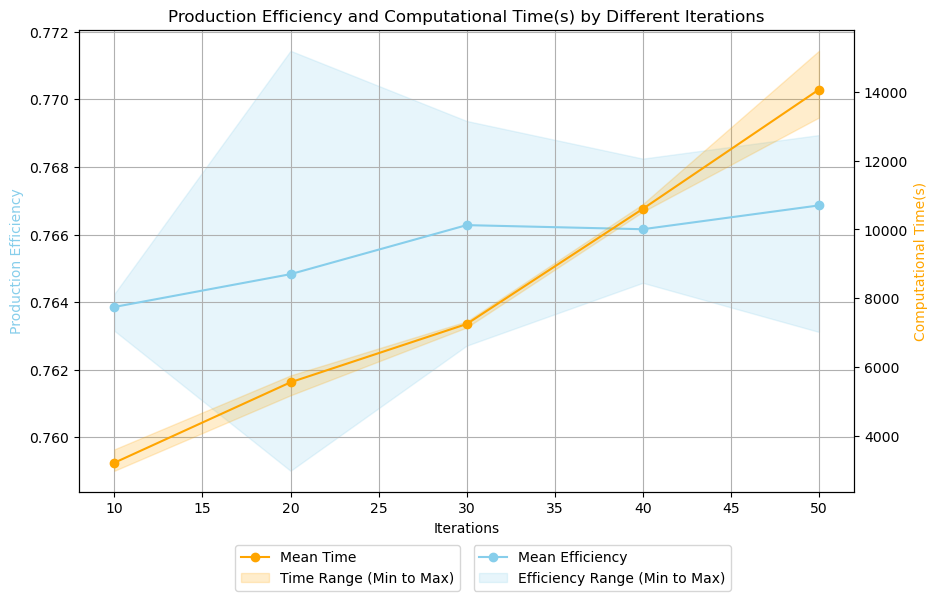

In [4]:
# Assuming the data structure in the file has columns like 'Cross Rate', 'Production Efficiency', 'Time Period'
# Group by 'Cross Rate' and calculate the statistics for each group
grouped = df.groupby('Iterations').agg({
    'Production Efficiency': ['min', 'max', 'mean'],
    'Time Period': ['min', 'max', 'mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Iterations', 'PE_min', 'PE_max', 'PE_mean', 'TP_min', 'TP_max', 'TP_mean']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Production Efficiency mean and range in blue
ax1.plot(grouped['Iterations'], grouped['PE_mean'], label='Mean Efficiency', color='skyblue', marker='o')
ax1.fill_between(grouped['Iterations'], grouped['PE_min'], grouped['PE_max'], color='skyblue', alpha=0.2, label='Efficiency Range (Min to Max)')

# Plot Time Period mean and range in orange
ax2 = ax1.twinx()
ax2.plot(grouped['Iterations'], grouped['TP_mean'], label='Mean Time', color='orange', marker='o')
ax2.fill_between(grouped['Iterations'], grouped['TP_min'], grouped['TP_max'], color='orange', alpha=0.2, label='Time Range (Min to Max)')

# Adding labels and titles
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Production Efficiency', color='skyblue')
ax2.set_ylabel('Computational Time(s)', color='orange')
plt.title('Production Efficiency and Computational Time(s) by Different Iterations')

# Show grid and legends
ax1.grid(True)
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.1))

plt.show()